In [134]:
import matplotlib.pyplot as plt 
import seaborn as  sns
import pandas as pb
import numpy as np #thu vien lam sach dl,chuyen doi

IMPORT DATASET

In [135]:
from google.colab import drive
drive.mount('/content/drive')#kết nối gg drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
data=pb.read_csv('/content/drive/MyDrive/KTDL/bank-data .csv',low_memory=False)#đọc file csv 

In [137]:
data.head(10)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
5,ID12106,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO,YES
6,ID12107,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO,YES
7,ID12108,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO,NO
8,ID12109,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO,NO
9,ID12110,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO,NO


In [138]:
data['age'].value_counts()

43    21
47    21
40    20
64    20
27    19
58    19
67    18
23    17
36    17
48    16
20    16
22    15
52    15
35    14
61    14
46    14
56    13
63    13
39    12
37    12
49    12
38    12
41    12
30    12
34    12
18    11
66    11
65    11
44    11
31    10
19    10
24    10
25    10
26    10
59    10
57    10
42    10
32     9
28     9
45     9
29     9
33     8
54     8
53     8
60     8
62     8
21     8
55     7
51     7
50     7
Name: age, dtype: int64

In [139]:
data['sex'].value_counts()

MALE      302
FEMALE    301
Name: sex, dtype: int64

In [140]:
data['region'].value_counts()

INNER_CITY    271
TOWN          174
RURAL          96
SUBURBAN       62
Name: region, dtype: int64

In [141]:
data['married'].value_counts()

YES    396
NO     204
?        3
Name: married, dtype: int64

In [142]:
data['income'].value_counts()

26671.6    16
38248.3     2
23894.8     1
46587.9     1
18923.0     1
           ..
61554.6     1
11520.8     1
14711.8     1
14092.7     1
21984.0     1
Name: income, Length: 599, dtype: int64

In [143]:
data['children'].value_counts()

0    273
2    137
1    136
3     69
Name: children, dtype: int64

In [144]:
data.shape

(615, 12)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           615 non-null    object 
 1   age          615 non-null    int64  
 2   sex          603 non-null    object 
 3   region       603 non-null    object 
 4   income       615 non-null    float64
 5   married      603 non-null    object 
 6   children     615 non-null    int64  
 7   car          615 non-null    object 
 8   save_act     615 non-null    object 
 9   current_act  603 non-null    object 
 10  mortgage     603 non-null    object 
 11  pep          615 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 57.8+ KB


In [146]:
for col in data.columns :
  Missing_data = data[col].isna().sum()
  missing_percent = Missing_data/len(data)*100
  print (f"Column {col} has : {missing_percent}% missing data")

Column id has : 0.0% missing data
Column age has : 0.0% missing data
Column sex has : 1.951219512195122% missing data
Column region has : 1.951219512195122% missing data
Column income has : 0.0% missing data
Column married has : 1.951219512195122% missing data
Column children has : 0.0% missing data
Column car has : 0.0% missing data
Column save_act has : 0.0% missing data
Column current_act has : 1.951219512195122% missing data
Column mortgage has : 1.951219512195122% missing data
Column pep has : 0.0% missing data


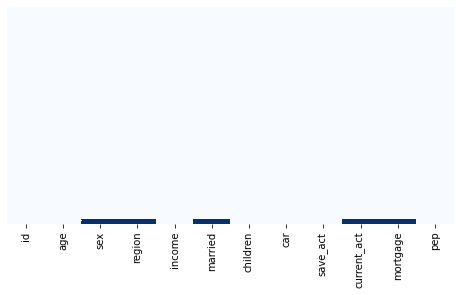

In [147]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(data.isna(), cmap = "Blues",cbar = False ,  yticklabels = False)

In [148]:
data=data.replace('?',np.NaN)

In [149]:
data=data.dropna()

In [150]:
data.shape#dếm dữ liệu 

(600, 12)

In [151]:
data.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [152]:
data["sex"].replace({"FEMALE": 0,"MALE": 1},inplace = True)
data["region"].replace({"INNER_CITY": 0,"TOWN": 1,"RURAL":2,"SUBURBAN":3},inplace = True)
data["married"].replace({"NO": 0,"YES": 1},inplace = True)
data["car"].replace({"NO": 0,"YES": 1},inplace = True)
data["save_act"].replace({"NO": 0,"YES": 1},inplace = True)
data["current_act"].replace({"NO": 0,"YES": 1},inplace = True)
data["mortgage"].replace({"NO": 0,"YES": 1},inplace = True)
data["pep"].replace({"NO": 0,"YES": 1},inplace = True)

In [153]:
import numpy
import pandas
from sklearn import datasets
from sklearn.model_selection import train_test_split#tách train với test
from sklearn import tree
import sklearn.metrics

In [154]:
data.drop('id', axis=1)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,0,0,17546.00,0,1,0,0,0,0,1
1,40,1,1,30085.10,1,3,1,0,1,1,0
2,51,0,0,16575.40,1,0,1,1,1,0,0
3,23,0,1,20375.40,1,3,0,0,1,0,0
4,57,0,2,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,2,1,1,1,1,0
596,30,0,0,9672.25,1,0,1,1,1,0,0
597,31,0,1,15976.30,1,0,1,1,0,0,1
598,29,1,0,14711.80,1,0,0,1,0,1,0


In [155]:
X_train, X_test, y_train, y_test = train_test_split(data[['age','sex','region','income','married','children','car','save_act','current_act','mortgage']].values,data['pep'].values,test_size=0.3, random_state=24)

In [156]:
data.to_csv("/content/drive/MyDrive/KTDL/lamsach.csv",index=False)

In [157]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

In [158]:
predicted = clf.predict(X_test)
print(predicted)

[1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1
 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1]


In [159]:
print(y_test)

[0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0]


In [160]:
conf_ma = sklearn.metrics.confusion_matrix(y_test,predicted)
acc_score = sklearn.metrics.accuracy_score(y_test,predicted)

In [161]:
print(conf_ma)

[[79 15]
 [16 70]]


In [162]:
print(acc_score)

0.8277777777777777


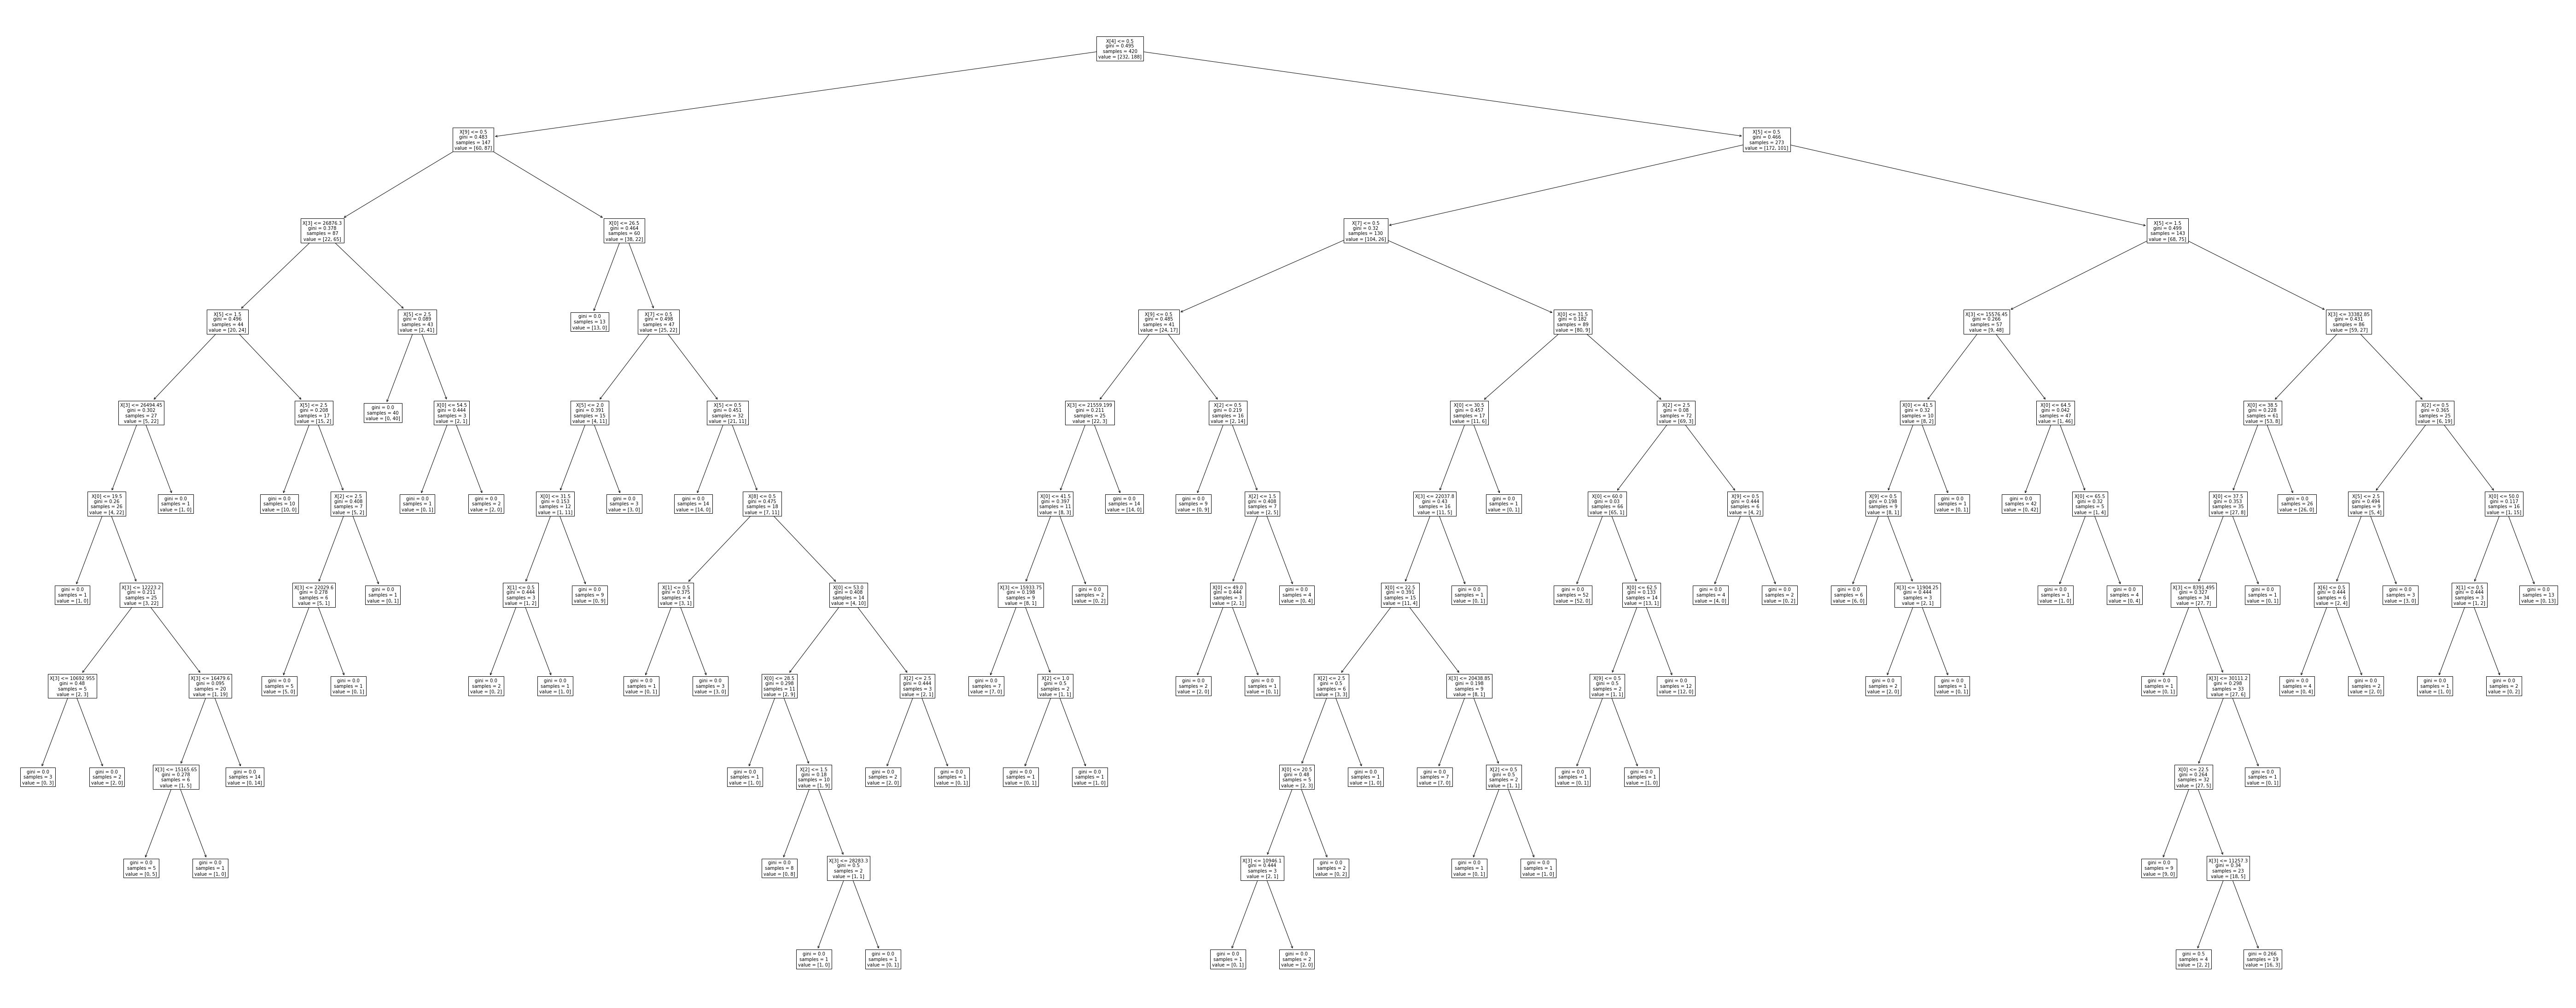

In [163]:
clf.fit(X_train, y_train)
# Plot the decision tree
fig, ax = plt.subplots(figsize=(100, 40))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [164]:
tree.export_graphviz(clf,out_file="/content/drive/MyDrive/KTDL/tree.dot",filled=True,rounded=True)